In [1]:
#1. Perform Exploratory data analysis. 
#   a. What can you conclude from methods of central tendency and deviation of the variables?
#   b. Are there any correlated variables?
#   c. Interpret the skewness of the variables.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\deekshitha\\Documents\\cancer.csv")

In [4]:
df

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [5]:
df.isna()

,Age,Year,Auxillary nodes,Survival
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


In [6]:
df.dropna()

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [7]:
df.describe() #By using discribe function we can know the dataset count, mean,standred deviation, min and max values which is 
              # useful to know standardization, normalization and skewness 

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


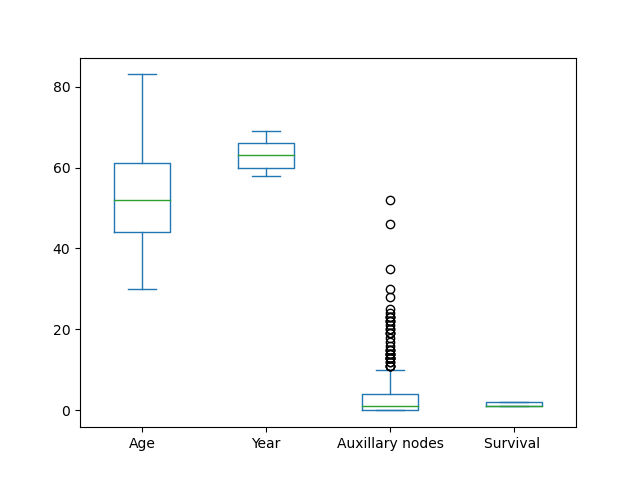

<AxesSubplot:>

In [14]:
%matplotlib notebook
df.plot.box()

<IPython.core.display.Javascript object>


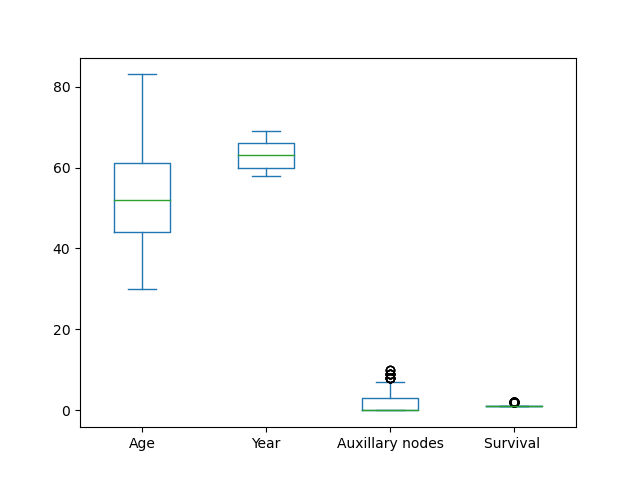

<AxesSubplot:>

In [15]:
maximum = 4+1.5*(4-0)  #for better releases i remved outliers 
final_data = df[df["Auxillary nodes"] <=maximum]
final_data.plot.box()

In [10]:
corr = final_data.corr() # For the cancer data set there is no correlation.
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


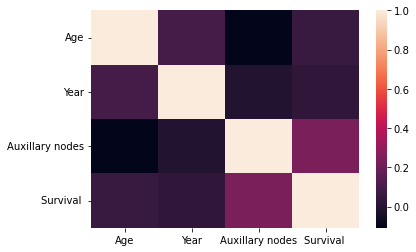

In [11]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr)
plt.show() #I did not find any corelation between two variables, 
           #I got positive correlation but not the strong positive corelation.
           #So, there no column to remove.

<IPython.core.display.Javascript object>


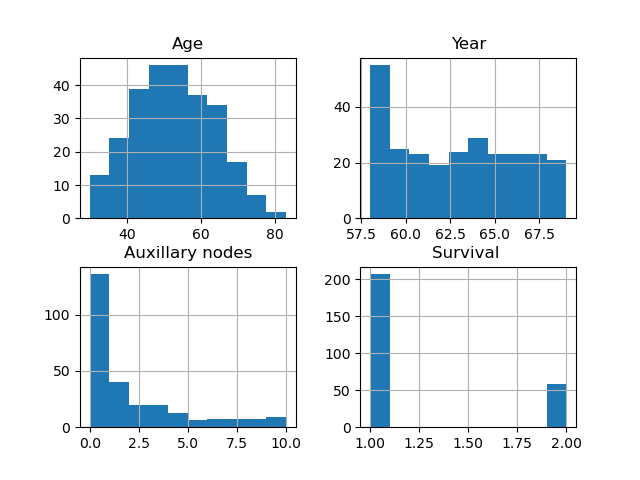

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

In [17]:
final_data.hist() # In these histograms I concluded that  Survival variables have the skewness. 
        

C:\Users\deekshitha\AppData\Local\Temp/ipykernel_7060/1634734398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data["Survival"] = final_data["Survival"] = 1.50


<IPython.core.display.Javascript object>


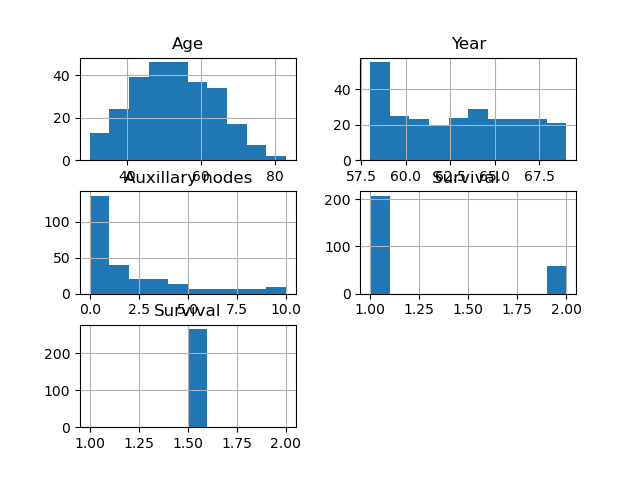

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>],
       [<AxesSubplot:title={'center':'Survival'}>, <AxesSubplot:>]],
      dtype=object)

In [24]:
final_data["Survival"] = final_data["Survival"] = 1.50 
final_data.hist()

In [25]:
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(final_data)
scaled = scaler.fit_transform(final_data)
scaled_data = pd.DataFrame(scaled, columns = final_data.columns)
scaled_data

,Age,Year,Auxillary nodes,Survival,Survival
0,-2.078151,-0.258085,0.507659,-0.529333,0.0
1,-2.078151,0.661993,-0.672425,-0.529333,0.0
2,-1.986534,-1.178162,0.114297,-0.529333,0.0
3,-1.986534,0.661993,0.901020,-0.529333,0.0
4,-1.803300,-1.484854,3.261188,-0.529333,0.0
...,...,...,...,...,...
260,2.044615,-0.258085,-0.279064,-0.529333,0.0
261,2.136233,1.275378,-0.672425,-0.529333,0.0
262,2.227850,0.661993,0.507659,-0.529333,0.0
263,2.319467,0.661993,-0.279064,1.889171,0.0


In [26]:
scaler = MinMaxScaler() # NOrmalization
scaler.fit(final_data)
scaled = scaler.fit_transform(final_data)
scaled_data = pd.DataFrame(scaled, columns = final_data.columns)
scaled_data

,Age,Year,Auxillary nodes,Survival,Survival
0,0.000000,0.363636,0.3,0.0,0.0
1,0.000000,0.636364,0.0,0.0,0.0
2,0.018868,0.090909,0.2,0.0,0.0
3,0.018868,0.636364,0.4,0.0,0.0
4,0.056604,0.000000,1.0,0.0,0.0
...,...,...,...,...,...
260,0.849057,0.363636,0.1,0.0,0.0
261,0.867925,0.818182,0.0,0.0,0.0
262,0.886792,0.636364,0.3,0.0,0.0
263,0.905660,0.636364,0.1,1.0,0.0


In [ ]:
final_data.to_csv('final_data.csv') #By using this function we can transfer the customized dataset to jupyter note book 
                       # where all files generally store.

In [ ]:
#2. Develop Supervised learning models. 
#   a. Logistic Regression
#   b. Random Forest
#   c. Support Vector Machine
#   d.Neural Network
# Compare the 4 methods based on the performance metrics and identify the best model for this problem.
#- Use 10 - fold cross validation.
#- Use GridSearchCV for searching through hyper parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm, datasets

In [2]:
final_data = pd.read_csv("final_data.csv")

In [29]:
final_data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival,Survival
0,0,30,62,3,1,0.75
1,1,30,65,0,1,0.75
2,2,31,59,2,1,0.75
3,3,31,65,4,1,0.75
4,4,33,58,10,1,0.75
...,...,...,...,...,...,...
260,300,75,62,1,1,0.75
261,301,76,67,0,1,0.75
262,302,77,65,3,1,0.75
263,303,78,65,1,2,0.75


In [3]:
X= final_data.drop(columns = ["Survival "])
y=final_data["Survival "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10,train_size = 0.6)
final_data
#In this code we are assgining values to X and y and splits the data for testing and training.With this code 
#we can find out Logistic Regression, Random Forest, Support Vector Machine, Neural Network laso to find best hyper parameters.
#Here for X input i chose all variables except Survivaland for y survival is the output.

,Unnamed: 0,Age,Year,Auxillary nodes,Survival,Survival
0,0,30,62,3,1,0.75
1,1,30,65,0,1,0.75
2,2,31,59,2,1,0.75
3,3,31,65,4,1,0.75
4,4,33,58,10,1,0.75
...,...,...,...,...,...,...
260,300,75,62,1,1,0.75
261,301,76,67,0,1,0.75
262,302,77,65,3,1,0.75
263,303,78,65,1,2,0.75


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



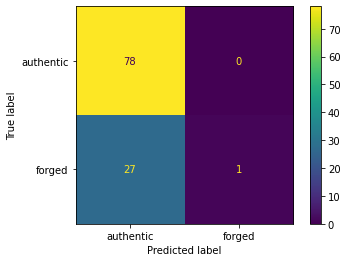

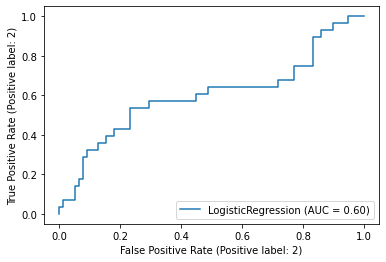

In [4]:
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
labels = ["authentic", "forged"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, X_test, y_test) 
plt.show()
# I have used three parameters those are solver, penalty, c again according t the output we can adjust them.
# For every solver we certain penalities we have to use penalties as per that.
#As I mentioned X-train is for input and y_train for output.
#From the figure I got 78 authentic data there is no un-accurate data.
#I got 28 forged data again in that 27 is wrongly classified and 1 classified correctly.

              precision    recall  f1-score   support

           1       0.73      0.95      0.83        78
           2       0.20      0.04      0.06        28

    accuracy                           0.71       106
   macro avg       0.47      0.49      0.44       106
weighted avg       0.59      0.71      0.62       106



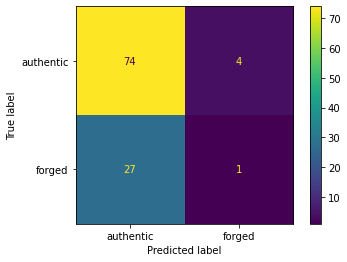

In [5]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))
#For RandomForest we have max_depth, number of estimers and max_features as parameters.
# Here I got 74 accurate data and 4 un-accurate data for authentic.
# for fordged 27 wrong classification and 1 correct classification.

C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



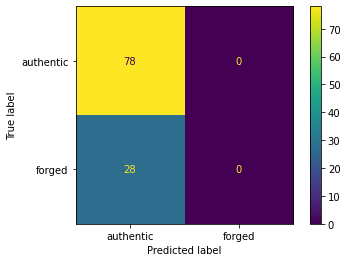

In [6]:
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
# In Support Vector Machine kernel, C, gamma are the parameters.
# For this all 78 are accurate foe athuntic.
# i got 0 correct classification.

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        78
           2       1.00      0.07      0.13        28

    accuracy                           0.75       106
   macro avg       0.88      0.54      0.50       106
weighted avg       0.82      0.75      0.67       106



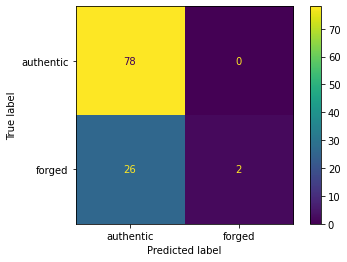

In [7]:
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
nn_pred = nn.predict(X_test)
cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))
#Neural networks the parameters are solvers, hidden_layer_sizes,learning_rate,learning_rate_init, activation.
#here all 78 are accurate for authentic and only  2 are correct classification for forged.

In [8]:
kf = KFold(n_splits=10)
iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333


In [9]:
parameters = {'kernel' :('linear','rbf','ploy'), 'C':[1,10] }
svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_


C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'ploy' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\deekshitha\anaconda3\lib\site-packages\sklearn\model_selection\_valid

{'C': 1, 'kernel': 'linear'}

In [ ]:
# 3. Evaluate if the algorithms are overfitting?

In [12]:
kf = KFold(n_splits=10)
iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    

Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333


In [ ]:
 # For third question we can decide whether the algorithm is overfitting or underfitting by observing the k-fold cross validation.
 # Here we determine Overfitting: Good performance on the training data, poor generliazation to other data.
  #                  Underfitting: Poor performance on the training data and poor generalization to other data.
  # and we find out those by comparing the average validation percentage and actual accuracy.
#  If we get both same then it is underfitting otherwise it is overfitting.
# when comes to me I got average accuracy = 0.802 and testing accuracy = 0.75 means both are different.
# So, it is overfitting and it has Good performance on the training data, poor generliazation to other data.


In [ ]:
""""4. Develop a function which can implement machine learning. 
def machine_learning (data, algorithm):
…..
…..
plot ROC curve
return performance metrics
Function call: machine_learning (data, neural_network)"""

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


Logistic: f1=0.000 auc=0.054


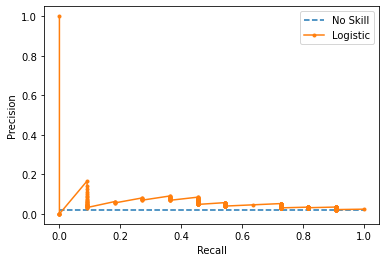

In [14]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
lr_probs = model.predict_proba(testX)
lr_probs = lr_probs[:, 1]
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [ ]:
# Note : for test particiption the submitted my github link both in assignment and quizz.